In [22]:
#========================================================================================================
# Q1
#========================================================================================================

import numpy as np
import matplotlib.pyplot as plt

# This question will simulate the Mandelbrot set, which indicates the divergence of the absolute value
# of the recursive function z_n+1 = (z_n)^2 + c, where c is a constant complex number

#Constants and data:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2j, 2j, 400)
MESH = np.meshgrid(x, y)
c = MESH[0] + MESH[1]
z0 = 0.0
loop_lim = 1000
epsilon = 100.0

In [23]:
# Defining function:
def recursion(c):
    '''
    Input: an array of complex numbers. Recursively adds the complex number
    to the square of the previous iteration. Checks for divergence of 
    the magnitude. Appends these values and their iteration number to their
    respective arrays. Removes these values from the main loop, and then 
    repeats the process. Outputs the arrays of complex numbers that diverge
    or remain bound and an array of the iteration number where the divergent
    numbers exceeded epsilon in magnitude.
    '''
    z0 = 0.0
    z_div = np.array([])
    i_div = np.array([])
    for i in range(loop_lim):
        z1 = z0 ** 2 + c
        abso = np.abs(z1) ** 2
        div = abso >= epsilon
        bound = abso <= epsilon
        z_div = np.append(z_div, c[div])
        for j in range(len(c[div])):
            i_div = np.append(i_div, i)
        c = c[bound]
        z1 = z1[bound]
        z0 = z1
    z_bound = c
    return z_div, i_div, z_bound


In [24]:
# Results:
z_div, i_div, z_bound = recursion(c)

x_div = np.real(z_div)
y_div = np.imag(z_div)
x_bound = np.real(z_bound)
y_bound = np.imag(z_bound)

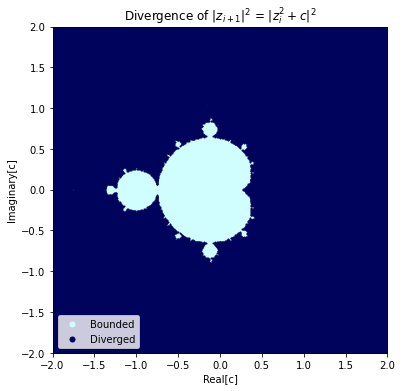

In [25]:
# Plotting:

# two-colour plot
fig, ax = plt.subplots(figsize=(6, 6)) 
plt.scatter(x_bound, y_bound, color='xkcd:pale blue', label='Bounded', s=1) 
plt.scatter(x_div, y_div, s=1, color='xkcd:dark blue', label='Diverged') 
plt.legend(loc='lower left', markerscale=5) 
plt.xlim(-2, 2) 
plt.ylim(-2, 2) 
plt.xlabel('Real[c]') 
plt.ylabel('Imaginary[c]') 
plt.title('Divergence of $|z_{i+1}|^2$ = $|z_i^2 + c|^2$') 
plt.show(block=False)  

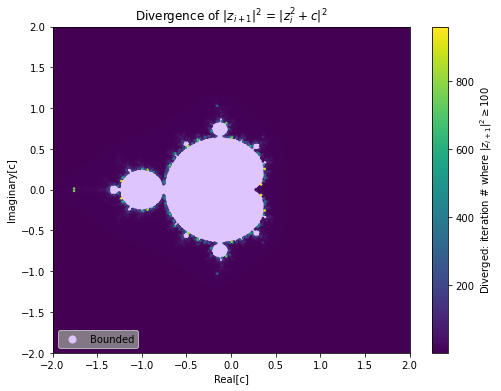

In [26]:
# colour bar plot
fig, ax = plt.subplots(figsize=(8, 6)) 
plt.scatter(x_bound, y_bound, color='xkcd:light lavender', label='Bounded', s=2) 
plt.scatter(x_div, y_div, s=2, c=i_div) 
plt.colorbar(label='Diverged: iteration # where $|z_{i+1}|^2 \geq 100$') 
plt.legend(loc='lower left', facecolor='xkcd:grey', markerscale=5) 
plt.xlim(-2, 2) 
plt.ylim(-2, 2) 
plt.xlabel('Real[c]') 
plt.ylabel('Imaginary[c]') 
plt.title('Divergence of $|z_{i+1}|^2$ = $|z_i^2 + c|^2$') 
plt.show(block=False)                                                                       

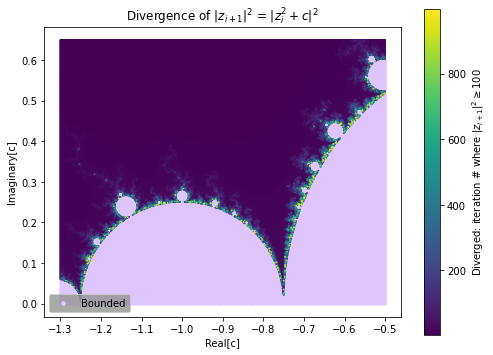

In [27]:
# zoomed in on portion
x_zoom = np.linspace(-1.3, -0.5, 600)
y_zoom = np.linspace(0.j, 0.65j, 600)
MESH_zoom = np.meshgrid(x_zoom, y_zoom)
c_zoom = MESH_zoom[0] + MESH_zoom[1]
z0 = 0.0

z_div_zoom, i_div_zoom, z_bound_zoom = recursion(c_zoom)
x_div_zoom = np.real(z_div_zoom)
y_div_zoom = np.imag(z_div_zoom)
x_bound_zoom = np.real(z_bound_zoom)
y_bound_zoom = np.imag(z_bound_zoom)

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x_bound_zoom, y_bound_zoom, color='xkcd:light lavender', label='Bounded', s=0.5) 
plt.scatter(x_div_zoom, y_div_zoom,s=0.5, c=i_div_zoom2)
plt.colorbar(label='Diverged: iteration # where $|z_{i+1}|^2 \geq 100$') 
plt.legend(loc='lower left', facecolor='xkcd:grey', markerscale=5)
plt.xlabel('Real[c]') 
plt.ylabel('Imaginary[c]') 
plt.title('Divergence of $|z_{i+1}|^2$ = $|z_i^2 + c|^2$') 
ax.set_aspect('equal')
plt.show(block=False)  

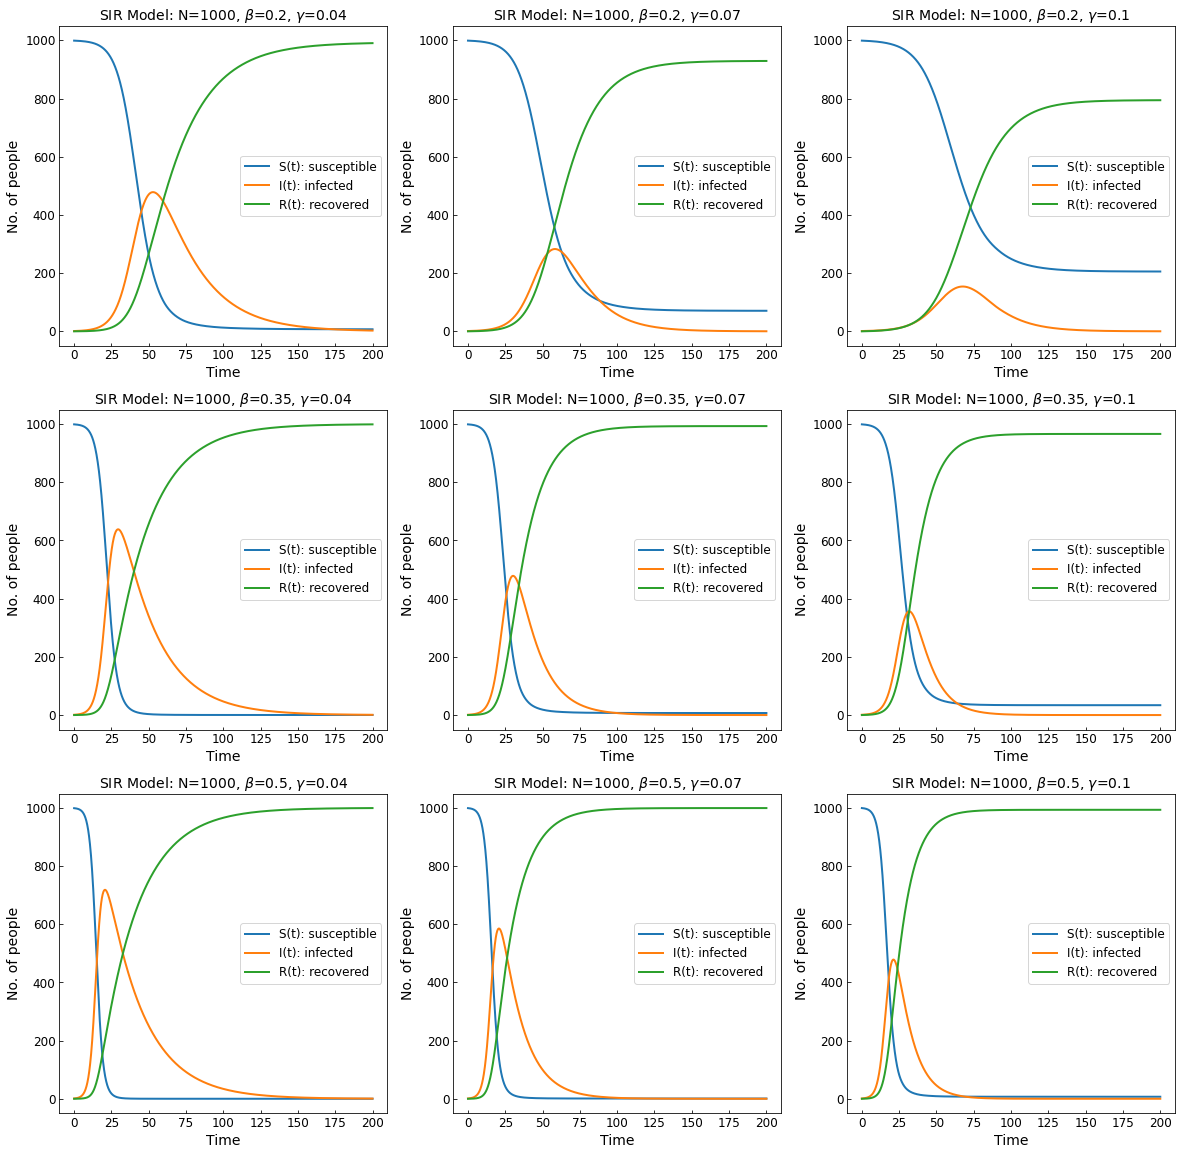

In [28]:
#========================================================================================================
# Q2: without bonus
#========================================================================================================

# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp

# Define constants, time spans, initial values (defined in the function)
beta = np.array([0.2, 0.35, 0.5])
gamma = np.array([0.04, 0.07, 0.1])
S_0 = 999
I_0 = 1
R_0 = 0
C_0 = [S_0, I_0, R_0]  # initial value list
N = 1000
tspan = np.linspace(0, 200, 2000)  # time span of measurement

# Define functions
def SIR_model(t, C, beta, gamma):
    '''
    S, I, and R are, respectively, the number of people susceptible,
    infected, and removed population - either by being recovered/immune
    or deceased - to a disease as a function of time. We assume here that 
    no deaths are caused such that R(t) is just recovered. Beta is the average 
    number of contacts per person per time, i.e the infection rate, and 
    gamma is often defined as 1/T, where T is the amount of time an 
    individual is infectious for. This function defines the three 
    differential equations which characterize the spread of disease in 
    epidemeology. It returns an array of the rate of change of each parameter. 
    N is the population number.
    '''
    S, I, R = C
    dSdt = - beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    ddt = [dSdt, dIdt, dRdt]
    return ddt

# Solving/Plotting
# Note that in order for solve_ivp to work correctly, the user must have
# scipy version 1.4.1 (the latest update) installed. Previous versions
# are unable to recognize the args input in the solver.
# The for loop will loop through the various beta and gamma values, solve
# the system of ODEs, and plot them in a grid.
# beta and gamma are often used to form the R-naught (R0) value, used to 
# describe the number of people whom one individual will infect. I based 
# my values off an R0 value of 5.

fig, ax = plt.subplots(3,3, figsize=(20,20))
i = 0
j = 0
for b in beta:
    for g in gamma:
        sol = solve_ivp(SIR_model, t_span=(tspan[0], tspan[-1]), y0=C_0, t_eval=tspan, args=(b, g))
        t_vals = sol.t
        S_vals = sol.y[0]
        I_vals = sol.y[1]
        R_vals = sol.y[2]
        ax[i, j].plot(t_vals, S_vals, label='S(t): susceptible', linewidth=2.0)
        ax[i, j].plot(t_vals, I_vals, label='I(t): infected', linewidth=2.0)
        ax[i, j].plot(t_vals, R_vals, label='R(t): recovered', linewidth=2.0)
        ax[i, j].set_title('SIR Model: N=1000, $\\beta$={}, $\\gamma$={}'.format(b, g), fontsize=14)
        ax[i, j].set_xlabel('Time', fontsize=14)
        ax[i, j].set_ylabel('No. of people', fontsize=14)
        ax[i, j].tick_params(direction='in', labelsize=12)
        ax[i, j].legend(loc='right', fontsize=12)
        j += 1
        if j == 3:
            j = 0
    i += 1

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


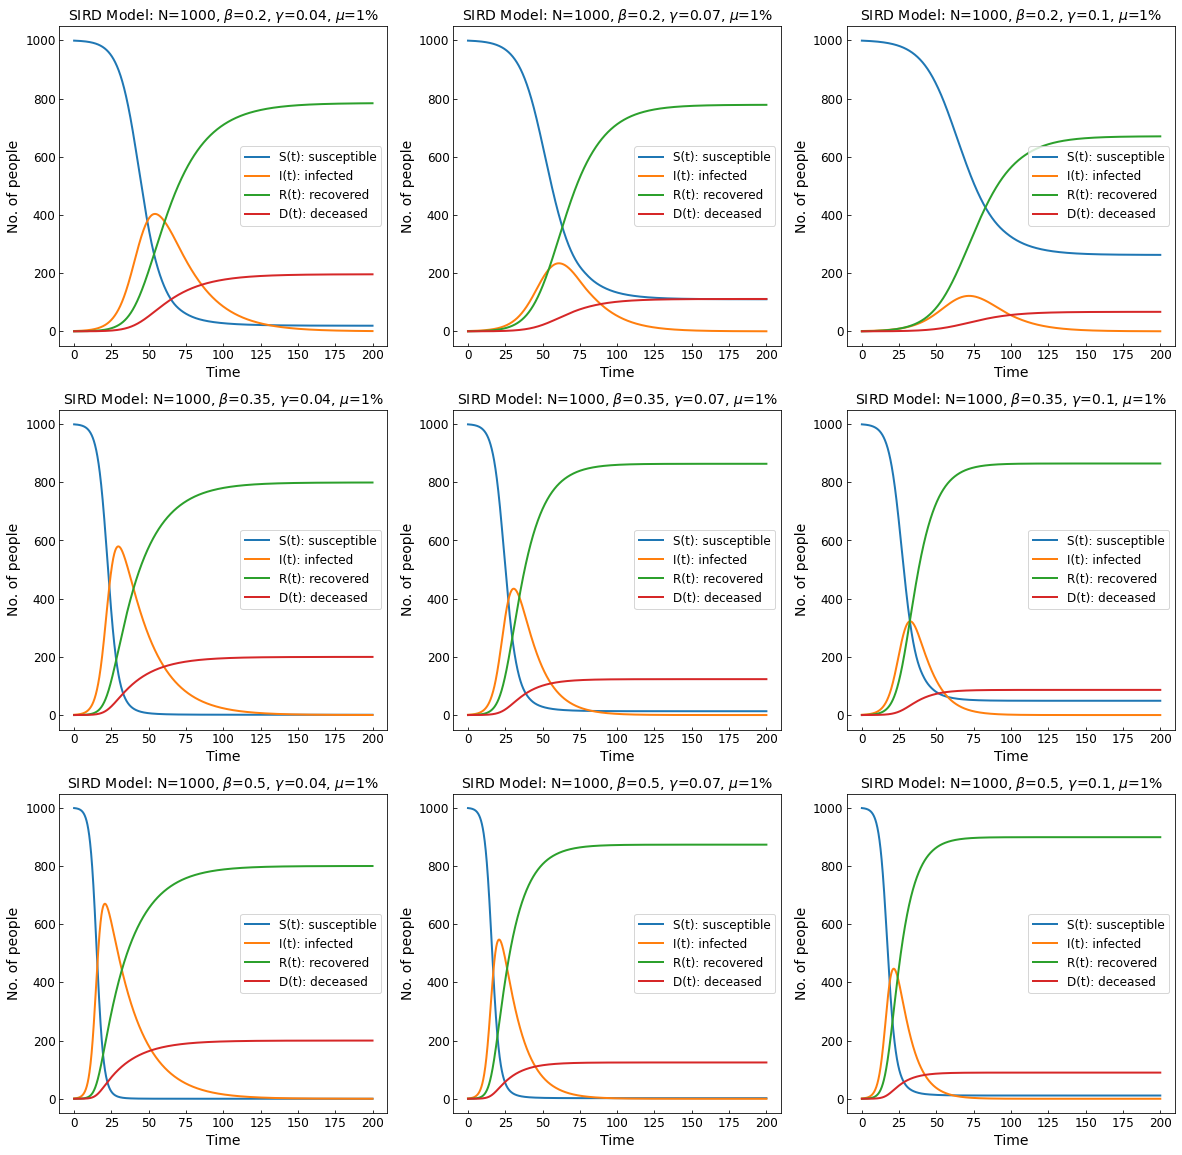

In [29]:
#========================================================================================================
# Q2: with bonus
#========================================================================================================

# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp

# Define constants, time spans, initial values (defined in the function)
beta = np.array([0.2, 0.35, 0.5])
gamma = np.array([0.04, 0.07, 0.1])
mu = 0.01
S_0 = 999
I_0 = 1
R_0 = 0
D_0 = 0
C_0 = [S_0, I_0, R_0, D_0]  # initial value list
N = 1000
tspan = np.linspace(0, 200, 2000)  # time span of measurement

# Define functions
def SIRD_model(t, C, beta, gamma, mu):
    '''
    We now switch to the SIRD Model. S is again the number of people 
    susceptible, and I those infected, to a disease as a function of time. 
    The SIRD model is important as it differentiates R, the removed population 
    from the SIR model, as either being recovered/immune (R) or deceased (D). 
    Beta is the infection rate, gamma is the recovery rate, and mu is the
    mortality rate. This function defines the four ODEs which characterize 
    the spread of disease in epidemeology. We see that the ODEs change now 
    to differentiaet between those recovered and deceased. It returns an 
    array of the rate of change of each parameter. N is the population number.
    '''
    S, I, R, D = C
    dSdt = - beta * S * I / N
    dIdt = (beta * S / N - gamma - mu) * I
    dRdt = gamma * I
    dDdt = mu * I
    ddt = [dSdt, dIdt, dRdt, dDdt]
    return ddt

# Solving/Plotting
# Note that in order for solve_ivp to work correctly, the user must have
# scipy version 1.4.1 (the latest update) installed. Previous versions
# are unable to recognize the args input in the solver.
# The for loop will loop through the various beta and gamma values, solve
# the system of ODEs, and plot them in a grid.
# beta and gamma are often used to form the R-naught (R0) value, used to 
# describe the number of people whom one individual will infect. I based 
# my values off an R0 value of 5.
# I chose an initial number of deaths as 0, and a mortality rate of 1%.
fig, ax = plt.subplots(3,3, figsize=(20,20))
i = 0
j = 0
for b in beta:
    for g in gamma:
        sol = solve_ivp(SIRD_model, t_span=(tspan[0], tspan[-1]), y0=C_0, t_eval=tspan,
                        args=(b, g, mu))
        t_vals = sol.t
        S_vals = sol.y[0]
        I_vals = sol.y[1]
        R_vals = sol.y[2]
        D_vals = sol.y[3]
        ax[i, j].plot(t_vals, S_vals, label='S(t): susceptible', linewidth=2.0)
        ax[i, j].plot(t_vals, I_vals, label='I(t): infected', linewidth=2.0)
        ax[i, j].plot(t_vals, R_vals, label='R(t): recovered',linewidth=2.0)
        ax[i, j].plot(t_vals, D_vals, label='D(t): deceased', linewidth=2.0)
        ax[i, j].set_title('SIRD Model: N=1000, $\\beta$={}, $\\gamma$={}, $\\mu$=1%'.format(b, g),
                           fontsize=14)
        ax[i, j].set_xlabel('Time', fontsize=14)
        ax[i, j].set_ylabel('No. of people', fontsize=14)
        ax[i, j].tick_params(direction='in', labelsize=12)
        ax[i, j].legend(loc='right', fontsize=12)
        j += 1
        if j == 3:
            j = 0
    i += 1

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

